导入必须要的库函数

In [21]:
# -*-conding:utf-8-*-
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

导入训练和测试数据集

In [22]:
mnist = input_data.read_data_sets('MNIST_data', one_hot = True)
print (u'数据导入完成。')

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
数据导入完成。


探索训练数据集

(784,)
(28, 28)


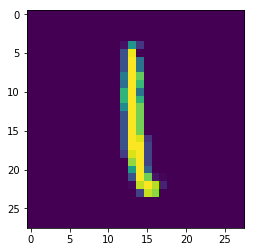

In [23]:
img = mnist.train.images[20]
print (img.shape)
img = img.reshape((28,28))
print (img.shape)
plt.imshow(img)

定义输入和输出

In [24]:
x = tf.placeholder(tf.float32, (None, 28, 28, 1), name = 'input')
y = tf.placeholder(tf.float32,(None, 28, 28, 1), name = 'labels')

定义权重和偏至

In [25]:
weights = {
    'conv1':tf.Variable(tf.truncated_normal([3, 3, 1, 64],stddev = 0.1)),
    'conv2':tf.Variable(tf.truncated_normal([3, 3, 64, 64],stddev = 0.1)),
    'conv3':tf.Variable(tf.truncated_normal([3, 3, 64, 32],stddev = 0.1)),
    'conv4':tf.Variable(tf.truncated_normal([3, 3, 32, 32],stddev = 0.1)),
    'conv5':tf.Variable(tf.truncated_normal([3, 3, 32, 64],stddev = 0.1)),
    'conv6':tf.Variable(tf.truncated_normal([3, 3, 64, 64],stddev = 0.1)),
    'output':tf.Variable(tf.truncated_normal([3, 3, 64, 1],stddev = 0.1))
}

biases = {
    'b1':tf.Variable(tf.zeros([64])),
    'b2':tf.Variable(tf.zeros([64])),
    'b3':tf.Variable(tf.zeros([32])),
    'b4':tf.Variable(tf.zeros([32])),
    'b5':tf.Variable(tf.zeros([64])),
    'b6':tf.Variable(tf.zeros([64])),
    'b_output':tf.Variable(tf.zeros([1]))
}

定义卷积函数

In [26]:
def conv2d(x, Weight, bias):
    x = tf.nn.conv2d(x, Weight, strides = [1,1,1,1], padding='SAME')
    x = tf.nn.bias_add(x, bias)
    x = tf.nn.relu(x)
    return x

定义池化函数

In [27]:
def maxpooling2d(x):
    return tf.nn.max_pool(x, ksize = [1,2,2,1], 
                          strides = [1,2,2,1], padding = 'SAME')

定义Upsamping函数

In [28]:
def upsampling(x, height, width):
    return tf.image.resize_nearest_neighbor(x, [height, width])

定义卷积网络

In [30]:
def conv_net(x, weights, biases):
    conv1 = conv2d(x, weights['conv1'], biases['b1'])
    conv1 = maxpooling2d(conv1)

    conv2 = conv2d(conv1, weights['conv2'], biases['b2'])
    conv2 = maxpooling2d(conv2)
    
    conv3 = conv2d(conv2, weights['conv3'], biases['b3'])
    conv3 = maxpooling2d(conv3)
    
    conv4 = upsampling(conv3, 7, 7)
    conv4 = conv2d(conv4, weights['conv4'], biases['b4'])
    
    conv5 = upsampling(conv4, 14,14)
    conv5 = conv2d(conv5, weights['conv5'], biases['b5'])
    
    conv6 = upsampling(conv5, 28,28)
    conv6 = conv2d(conv6, weights['conv6'], biases['b6'])
    
    output = tf.nn.conv2d(conv6, weights['output'], strides = [1,1,1,1], padding ='SAME')
    output = tf.nn.bias_add(output, biases['b_output'])
    return output

定义损失和优化

In [31]:
logits = conv_net(x, weights, biases)
out_put = tf.nn.sigmoid(logits, name = 'out_put')
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels = y, logits = logits))

optimizer = tf.train.AdamOptimizer(learning_rate = 0.001).minimize(cost)

训练卷积网络

In [32]:
epochs = 2
batch_size = 128

init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init)

for epoch in range(epochs):
    for i in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        imgs = batch[0].reshape((-1, 28, 28, 1))
        noisy_imgs = imgs + 0.5*np.random.randn(*imgs.shape)
        noisy_imgs = np.clip(noisy_imgs, 0., 1.)
        batch_cost, _ = sess.run([cost,optimizer], feed_dict={x:noisy_imgs, y:imgs})
        if i % 10 == 0:
            print ('Epoch: {}/{} Batch: {}'.format(epoch+1, epochs, i),'Trianing loss: {:.4f}'.format(batch_cost))

Epoch: 1/2 Batch: 0 Trianing loss: 0.9855
Epoch: 1/2 Batch: 10 Trianing loss: 0.3476
Epoch: 1/2 Batch: 20 Trianing loss: 0.2645
Epoch: 1/2 Batch: 30 Trianing loss: 0.2466
Epoch: 1/2 Batch: 40 Trianing loss: 0.2399
Epoch: 1/2 Batch: 50 Trianing loss: 0.2255
Epoch: 1/2 Batch: 60 Trianing loss: 0.2173
Epoch: 1/2 Batch: 70 Trianing loss: 0.2029
Epoch: 1/2 Batch: 80 Trianing loss: 0.2018
Epoch: 1/2 Batch: 90 Trianing loss: 0.1940
Epoch: 1/2 Batch: 100 Trianing loss: 0.1773
Epoch: 1/2 Batch: 110 Trianing loss: 0.1851
Epoch: 1/2 Batch: 120 Trianing loss: 0.1767
Epoch: 1/2 Batch: 130 Trianing loss: 0.1739
Epoch: 1/2 Batch: 140 Trianing loss: 0.1832
Epoch: 1/2 Batch: 150 Trianing loss: 0.1716
Epoch: 1/2 Batch: 160 Trianing loss: 0.1662
Epoch: 1/2 Batch: 170 Trianing loss: 0.1654
Epoch: 1/2 Batch: 180 Trianing loss: 0.1591
Epoch: 1/2 Batch: 190 Trianing loss: 0.1608
Epoch: 1/2 Batch: 200 Trianing loss: 0.1684
Epoch: 1/2 Batch: 210 Trianing loss: 0.1660
Epoch: 1/2 Batch: 220 Trianing loss: 0.1675

保存参数

In [33]:
save_file = './model.ckpt'
saver = tf.train.Saver()
saver.save(sess, save_file)

'./model.ckpt'

用10个测试集验证训练结果

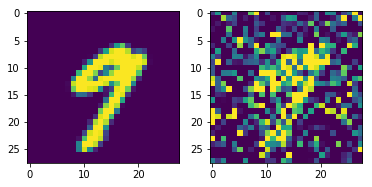

In [34]:
test_imgs = mnist.test.images[20:30]
test_imgs = test_imgs.reshape((-1, 28, 28, 1))
plt.subplot(121)
plt.imshow(test_imgs[0].reshape((28,28)))
noisy_imgs = test_imgs + 0.5*np.random.randn(*test_imgs.shape)
noisy_imgs = np.clip(noisy_imgs, 0., 1.)
plt.subplot(122)
plt.imshow(noisy_imgs[0].reshape((28,28)))

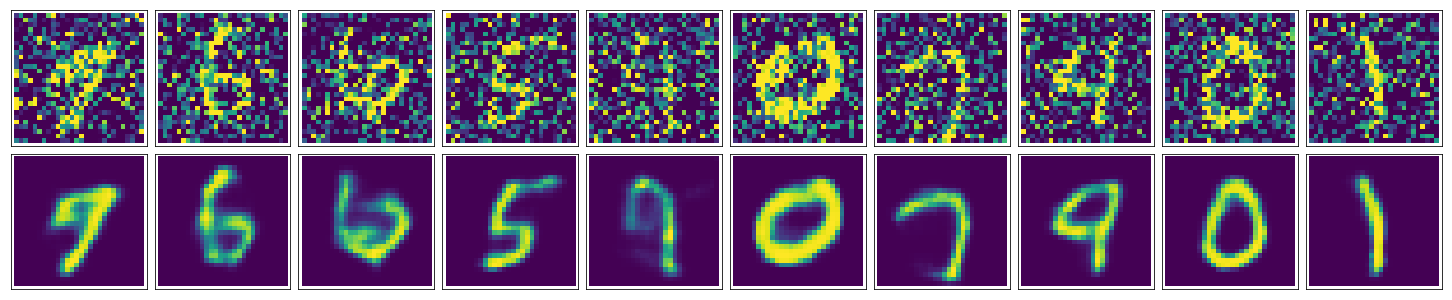

In [35]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))

reconstructed = sess.run(out_put, feed_dict={x:noisy_imgs})

for images, row in zip([noisy_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)